# Problem Statement
The data scientists at BigMart have collected **2013 sales data** for **1559 products** across **10 stores** in **different cities**. Also, certain attributes of each product and store have been defined. The aim is to **build a predictive model** and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


Please note that the **data may have missing values** as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

![](https://media.giphy.com/media/VTXzh4qtahZS/giphy.gif)

## Data
We have a train (8523 observations) and test (5681 observations) dataset, the train data set has both input and output variable(s). We need to predict the sales for the test dataset.


|Variable|Description|
|---|---|
|Item_Identifier|Unique Product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visability|The % of the total display area of all products in a store allocated to the particular product|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in a particular store. This is the outcome variable to be predicted.|

## Plan of attack
We'll explore the problem using the following steps:
1. **Hypothesis Generation**: Understand the problem by brainstorming ideas about how the outcome can be affected by possible factors
	* Store level hypothesis
	* Product level hypothesis
2. **Data Exploration**: Look at the categorical and continuous features and make inferences about the data
3. **Data Cleaning**: Check the data for missing and incorrect values, outliers. Think about strategies on how to deal with these observations.
4. **Feature Engineering (Optional)**: Modify the existing variables and create new ones
5. **Modelling**: Make predictive models on the data. Try to create a reusable pipeline for all the models.
	* Linear Regression
	* Decision Tree
	* Random Forest
	* SVR (Support Vector Regreesion)
	* XGBoost

## Additional Notes
* Combine the two datasets to do all the needed data preprocessing. After applying all the preprocessing, split the datasets again.
* Compare the model results using metrics and visualization graphics.


In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
%matplotlib inline

In [3]:
SEED = 42
np.random.seed(SEED)

### 1. Hypothesis Generation
#### Store Level Hypothesis
✅ - We have data about these hypothesis.
* **<span style="color:Green">Place</span>**: Stores in the urban places will have higher sales because there are more people in the urban areas rather than in the villages. ✅
* **<span style="color:red">Population</span>**: Stores placed in locations with higher population will generate higher sales because of the demand.
* **<span style="color:red">Feedback</span>**: Stores with more positive feedback, will have higher sales because of the comfortable environment and the kind employees.
* **<span style="color:red">Competitors</span>**: Stores which have competitors nearby will generate lower sales because of more competition.
* **<span style="color:red">Marketing</span>**: Stores which have good advertising (TV ads and paper catalogs) will generate higher sales.
* **<span style="color:Green">Location</span>**: Stores which are in more famous locations will generate higher sales. ✅
* **<span style="color:Green">Store Capacity</span>**: Stores with higher capacity will generate higher sales because they will have a diverse range of products and many product units. ✅
* **<span style="color:red">Work Hours</span>**: Stores which have longer working hours will generate higher sales.
* **<span style="color:red">Payment Types</span>**: Stores which are offering many types of payment will generate higher sales.
* **<span style="color:red">Place of payment</span>**: Stores which are offering some kind of recompense if the client is waiting too much will generate higher sales.
* **<span style="color:red">Toys for Kids</span>**: Stores which are offering some types of free toys for the kids when you spent a certain amount of money will generate higher sales.
* **<span style="color:red">Mobile App</span>**: Stores which have a mobile application will generate higher sales because of the convenient to look at the weekly offers.
* **<span style="color:red">Product Returns</span>**: Stores which are offering product returns will generate higher sales because of the emotional sense of loyalty.
* **<span style="color:red">Shopping Type</span>** Stores which are offering online shopping will generate higher sales because of the customers' saved time and convenience.
* **<span style="color:red">Data Analysis, ML</span>**: Stores which are using data analysis and machine learning on their historical data will generate higher sales. 😃
* **<span style="color:red">Demographics</span>**: Based on race, some races can generate higher sales
* **<span style="color:red">Income</span>**: Based on the income, people with higher income can generate higher sales
* **<span style="color:red">Political Vision</span>**: People with are with conservative political vision maybe will generate higher sales 
* **<span style="color:red">Weather</span>**: Based on the weather conditions people can generate higher sales

#### Product Level Hypothesis
* **<span style="color:Green">Visibility</span>**: Better-placed products will generate higher sales because more people are looking at them, so there is a high chance to buy some of them. ✅
* **<span style="color:Green">Product Diversity</span>**: Stores which are selling many types of products (supermarkets) will have higher sales because people will buy many products of them. ✅
* **<span style="color:red">Promotions</span>**: Products which have a promotion will generate higher sales.
* **<span style="color:red">Quality</span>**: Products with higher quality will generate higher sales.
* **<span style="color:red">Brand</span>**: Branded products will generate higher sales because of the trust in the customers.
* **<span style="color:Green">Daily Products</span>**: Stores which are offering daily-used products will generate higher sales because of the high demand. ✅
* **<span style="color:red">Bioproducts</span>** Stores which are offering bioproducts will generate higher sales because people want to be healthy.
* **<span style="color:Green">Price</span>**: Products which have lower prices will generate higher sales. ✅
* **<span style="color:red">Expiration Date of Product</span>**: If the product expiration date is going to expire in 2-3 days are the people going to take this product?

|Variable|Description|Relation to Hypothesis|
|---|---|---|
|Item_Identifier|Unique Product ID|ID Variable|
|Item_Weight|Weight of product|Not considered in hypothesis|
|Item_Fat_Content|Whether the product is low fat or not|Linked to "Daily Products" hypothesis. Low-fat products are used more.|
|Item_Visability|The % of the total display area of all products in a store allocated to the particular product|Linked to "Visibility" hypothesis.|
|Item_Type|The category to which the product belongs|Linked to "Product Diversity" hypothesis|
|Item_MRP|Maximum Retail Price (list price) of the product|Linked to "Price" hypothesis|
|Outlet_Identifier|Unique store ID|ID Variable|
|Outlet_Establishment_Year|The year in which store was established|Not considered in hypothesis|
|Outlet_Size|The size of the store in terms of ground area covered|Considered in the "Store Capacity" hypothesis|
|Outlet_Location_Type|The type of city in which the store is located|Considered in "Location" hypothesis|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|Considered in the "Supermarket" hypothesis|
|Item_Outlet_Sales|Sales of the product in a particular store. This is the outcome variable to be predicted.|Outcome Variable|

### Part 2: Exploratory Data Analysis

In [4]:
train_data = pd.read_csv("Train_Data.csv")
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test_data = pd.read_csv("Test_Data.csv")
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


#### Concatenate the Datasets
It's a good idea to combine the datasets, because this way we'll clean the data for the 2 datasets in one shot.

In [6]:
data = pd.concat([train_data, test_data], ignore_index = True, sort = False)

In [7]:
print(train_data.shape, test_data.shape, data.shape)

(8523, 12) (5681, 11) (14204, 12)


Let's look at a consice summary about the data. Here, we can see the column types and missing data.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


We can see that there are missing values for the **Item_Weight** and **Outlet_Size** columns. **Item_outlet_Sales** also have missing values, but this is because there are no values in the test set.

In [9]:
len(train_data)

8523

Now, let's look at some basic statistics about the numeric columns using the "describe" function.

In [10]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


* We don't know the currency for the Item_MRP column, but we suspect that it's India rupee. Maybe, this is the site: https://www.bigmartretail.com/. 
* Later, we can use the **Outlet_Establishemnt_Year** to calculate the duration (in months or years) from the establishment.

In [11]:
data[["Item_Type", "Item_MRP"]].sort_values("Item_MRP")

,Item_Type,Item_MRP
153,Soft Drinks,31.2900
6958,Soft Drinks,31.4900
2135,Soft Drinks,31.8900
2242,Frozen Foods,31.9558
2011,Breads,31.9558
10799,Household,31.9900
5341,Frozen Foods,32.0558
12393,Household,32.0558
8553,Household,32.0900
8038,Soft Drinks,32.0900


Later, we can use pivot tables to look at the summary statistics about the different item types.

In [12]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [13]:
data.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [14]:
selected_data = data[["Item_Type", "Item_MRP", "Item_Identifier"]]
pivot_data = pd.pivot_table(selected_data, 
                            values = "Item_MRP",
                            index = data.index.values,
                            columns = ["Item_Type"],
                            aggfunc = np.sum)
pivot_data.describe()

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
count,1086.000000,416.000000,186.000000,1084.000000,1136.000000,1426.000000,2013.000000,362.000000,858.000000,1548.000000,736.000000,280.000000,89.000000,1989.000000,726.000000,269.000000
mean,127.458237,141.389849,137.985444,138.620936,147.230998,136.467385,144.304237,137.295031,133.108079,148.736501,140.291141,133.745047,141.288751,146.460309,135.403726,149.751917
std,57.300836,63.190637,56.218724,60.162335,70.178385,66.597339,59.221923,65.780697,59.799825,62.545452,59.003779,60.733972,60.200329,59.554434,60.552403,66.716959
min,33.487400,31.955800,38.248000,35.950600,33.287400,31.955800,34.819000,34.253200,32.821600,31.990000,34.553200,34.819000,33.721600,32.355800,31.290000,34.053200
25%,86.478350,93.818600,99.035800,89.716550,87.944150,82.900650,99.901600,74.878800,96.665350,106.521400,98.554200,83.990800,108.459600,104.962200,85.313200,92.680400
50%,117.412400,130.115200,152.468200,133.294200,146.427300,126.152000,145.141800,144.362800,129.646800,152.502400,142.631200,132.328400,156.960400,147.476000,145.228600,168.615800
75%,172.017200,193.229400,176.537000,184.100950,210.249400,188.847700,188.087200,179.108100,165.751300,191.103000,184.487100,183.843700,185.058200,186.989800,184.725300,194.082000
max,265.556800,263.659400,234.930000,266.888400,266.688400,264.891000,264.225200,261.827800,266.688400,264.791000,261.593600,254.904000,240.488000,265.056800,263.591000,263.625200


In [15]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [16]:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [17]:
data.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [18]:
data.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [19]:
data.Outlet_Establishment_Year.value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [20]:
data.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [21]:
data.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [22]:
result = pd.crosstab(data['Outlet_Identifier'], data['Outlet_Size'].fillna('n/a'))
result

Outlet_Size,High,Medium,Small,n/a
Outlet_Identifier,,,,
OUT010,0,0,0,925
OUT013,1553,0,0,0
OUT017,0,0,0,1543
OUT018,0,1546,0,0
OUT019,0,0,880,0
OUT027,0,1559,0,0
OUT035,0,0,1550,0
OUT045,0,0,0,1548
OUT046,0,0,1550,0


In [23]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [24]:
data.Item_Visibility.value_counts()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
0.076975      3
0.077011      3
0.076792      3
0.076483      3
0.046899      2
0.159844      2
0.135708      2
0.135944      2
0.072298      2
0.136008      2
0.136896      2
0.203401      2
0.081788      2
0.075049      2
0.058369      2
0.104784      2
0.080131      2
0.072411      2
0.024635      2
0.052069      2
0.079968      2
0.179192      2
0.079806      2
0.121767      2
0.080625      2
           ... 
0.013147      1
0.098790      1
0.073397      1
0.137756      1
0.017937      1
0.105126      1
0.044156      1
0.141639      1
0.094411      1
0.074883      1
0.039236      1
0.044497      1
0.051147      1
0.175061      1
0.039034      1
0.077508      1
0.078943      1
0.077170      1
0.042959      1
0.013173      1
0.069939      1
0.011305      1
0.069042      1
0.012216      1
0.064142      1
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, L

In [25]:
sum(data['Item_Visibility'] == 0) / len(data)

0.06188397634469164

In [26]:
data['Item_Visibility'].replace(0.00000, np.nan, inplace = True)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,NaN,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Creating a Dataset without missing values

In [27]:
no_null_data = data.dropna(subset = ['Item_Weight', 'Outlet_Size', 'Item_Visibility'])

In [28]:
no_null_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7246.000000,7246.000000,7246.000000,7246.000000,4358.000000
mean,12.804071,0.064214,141.124233,1999.187138,2275.359278
std,4.649037,0.042689,62.042925,7.391490,1502.360095
min,4.555000,0.003589,31.490000,1987.000000,69.243200
25%,8.710000,0.029904,94.143600,1997.000000,1125.368450
50%,12.600000,0.054216,142.047000,1999.000000,1947.797900
75%,16.750000,0.090310,185.857550,2004.000000,3108.953100
max,21.350000,0.188323,266.888400,2009.000000,10256.649000


In [29]:
no_null_data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            2888
dtype: int64

In [30]:
len(no_null_data), len(data)

(7246, 14204)

### Cleaning the Data
In this section, we'll look for missing values, and outliers and maybe remove or replace some of them.

In [31]:
data.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [32]:
for item_type in data.Item_Type.unique():
    condition = data["Item_Type"] == item_type
    mean_item_weight = data.loc[condition, 'Item_Weight'].mean()
    data.loc[condition, 'Item_Weight'] = data.loc[condition, 'Item_Weight'].fillna(mean_item_weight)
    print("Item Type: " + str(item_type) + ", Mean Item Weight: " + str(mean_item_weight))

Item Type: Dairy, Mean Item Weight: 13.23835812964935
Item Type: Soft Drinks, Mean Item Weight: 11.788407960199033
Item Type: Meat, Mean Item Weight: 12.766103789126895
Item Type: Fruits and Vegetables, Mean Item Weight: 13.194406118776207
Item Type: Household, Mean Item Weight: 13.337976653696572
Item Type: Baking Goods, Mean Item Weight: 12.275211111111153
Item Type: Snack Foods, Mean Item Weight: 12.865732002419794
Item Type: Frozen Foods, Mean Item Weight: 12.569323404255385
Item Type: Breakfast, Mean Item Weight: 13.179111842105247
Item Type: Health and Hygiene, Mean Item Weight: 13.171739436619777
Item Type: Hard Drinks, Mean Item Weight: 11.576204620462056
Item Type: Canned, Mean Item Weight: 12.340829621380879
Item Type: Breads, Mean Item Weight: 11.152361516034995
Item Type: Starchy Foods, Mean Item Weight: 13.659757709251092
Item Type: Others, Mean Item Weight: 13.915723684210517
Item Type: Seafood, Mean Item Weight: 12.76027397260274


In [33]:
# data.Item_Visibility.value_counts()
data[data.Item_Visibility.isnull()]
data.Outlet_Identifier.unique()

# Средното на тази категория за този магазин
# Ако нямаме Item_Visibility за тази категория, средното Item_Visibility за всички продукти в магазина

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [34]:
for index, row in data[data.Item_Visibility.isnull()].iterrows():
    conditions = (data["Item_Type"] == row["Item_Type"]) & (data["Outlet_Identifier"] == row["Outlet_Identifier"])
    mean_item_visibility = data.loc[conditions, "Item_Visibility"].mean()
    data.loc[conditions, "Item_Visibility"] = data.loc[conditions, "Item_Visibility"].fillna(mean_item_visibility)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
Item_Identifier              14204 non-null object
Item_Weight                  14204 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [36]:
# data.Outlet_Size.value_counts()
data.groupby(["Outlet_Identifier", "Outlet_Size"]).count()

,,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Outlet_Identifier,Outlet_Size,,,,,,,,,,
OUT013,High,1553,1553,1553,1553,1553,1553,1553,1553,1553,932
OUT018,Medium,1546,1546,1546,1546,1546,1546,1546,1546,1546,928
OUT019,Small,880,880,880,880,880,880,880,880,880,528
OUT027,Medium,1559,1559,1559,1559,1559,1559,1559,1559,1559,935
OUT035,Small,1550,1550,1550,1550,1550,1550,1550,1550,1550,930
OUT046,Small,1550,1550,1550,1550,1550,1550,1550,1550,1550,930
OUT049,Medium,1550,1550,1550,1550,1550,1550,1550,1550,1550,930


In [37]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [38]:
data["Item_Fat_Content"].replace({"low fat": "Low Fat", "LF": "Low Fat", "reg": "Regular"}, inplace = True)

In [39]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [40]:
result = pd.crosstab(data["Item_Fat_Content"], data["Item_Type"])
result

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Fat_Content,,,,,,,,,,,,,,,,
Low Fat,542,222,66,549,691,731,1086,362,858,1548,282,280,53,1141,617,157
Regular,544,194,120,535,445,695,927,0,0,0,454,0,36,848,109,112


In [41]:
import seaborn as sns

#### Checking for Outliers in the Item_MRP

In [42]:
q1, q3 = np.percentile(data.Item_MRP, [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

In [43]:
lower_bound, upper_bound

(-43.7534, 323.621)

In [44]:
data[(data.Item_MRP < lower_bound) & (data.Item_MRP > upper_bound)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


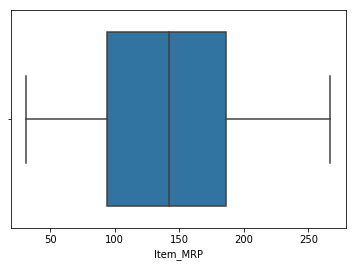

In [45]:
sns.boxplot(data.Item_MRP)
plt.show()

### Checking for outliers in the Item_Visibility

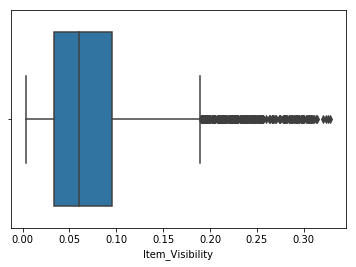

In [46]:
sns.boxplot(data.Item_Visibility)
plt.show()

In [47]:
q1, q3 = np.percentile(data.Item_Visibility, [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

In [48]:
lower_bound, upper_bound

(-0.06103787087500001, 0.19011226812499998)

In [53]:
len(data[data["Item_Visibility"] > upper_bound]) / len(data)
# TODO: Do we need to remove the 2% outliers here?

0.019290340749084766

In [63]:
q1, q3 = np.percentile(data.Item_Weight, [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
lower_bound, upper_bound

(-0.7499999999999982, 26.049999999999997)

In [64]:
data[data.Item_Weight < lower_bound]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


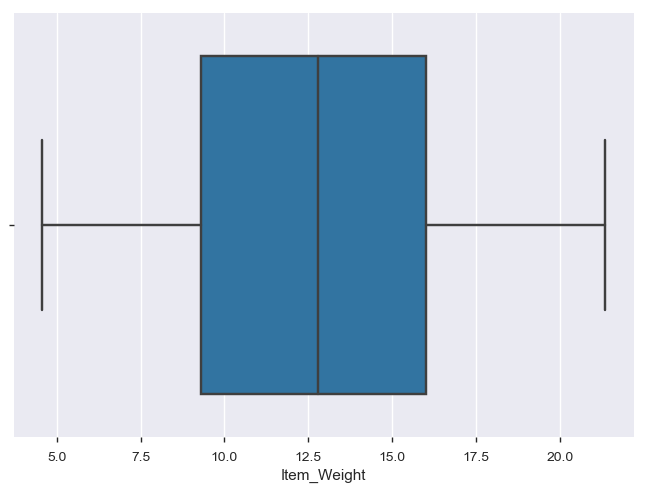

In [67]:
sns.boxplot(data.Item_Weight)
plt.show()

In [51]:
pandas_profiling.ProfileReport(data)

Number of variables,12
Number of observations,14204
Total Missing (%),5.7%
Total size in memory,1.3 MiB
Average record size in memory,96.0 B
Numeric,5
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# Notes for the Next Time
* **Analyse the data**. Look more in the histograms and analysis above. Also, look for correlations.
* Maybe feature engineering
## Next Time
* Create a correlation matrix
* Decide what we'll do with the **OutletSize** - manually replace the values or using imputer strategy
* **Normalize** the data. **Dummy variables** (be careful of the **trap**), Look for **outliers**
* Try to **fit some models**.

## Resources
* [How to Increase Sales Retail](https://www.vendhq.com/blog/how-to-increase-sales-retail/)